In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
#import Modules.Background.background as back
import matplotlib.pyplot as plt
#import test as mulf

from scipy.integrate import solve_ivp
from scipy import interpolate

import metod as met
import proca_mod as ru

In [3]:
####################
from matplotlib.colors import LinearSegmentedColormap

from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from scipy.integrate import solve_ivp, quad
from scipy.linalg import eig
from matplotlib.patches import FancyArrowPatch

from mpl_toolkits.mplot3d.proj3d import proj_transform
from mpl_toolkits.mplot3d import proj3d
from matplotlib.text import Annotation
from matplotlib.patches import ArrowStyle
from matplotlib import cm 


In [4]:
import plt_conf as conf
conf.general()  # cargando configuración general

## Funciones. 

In [5]:
def circlef(ax, xy0, func, rad, inrad=0,
            halo_color='blue', colf='blue',
            center_color='white', npt=500, orig=False,
            colorbar=False, fig=None, pad=0.02, label=r'$n(r)$',
            location='left', aspect=20, fraction=0.047, zorder=3, fxy=False): 
    
    # he default drawing order for axes is patches, lines, text. 
    # This order is determined by the zorder attribute. The following defaults are set
    
    x0, y0 = xy0
    # Creando la malla                 
    xcoord = [x0 - rad, x0 + rad]  # [xmin, xmax]
    ycoord = [y0 - rad, y0 + rad]  # [ymin, ymax]
    
    x, y = np.meshgrid(
        np.linspace(xcoord[0], xcoord[1], npt),
        np.linspace(ycoord[0], ycoord[1], npt))
    r = np.sqrt((x-x0)**2 + (y-y0)**2)
    
    if orig:
        z = np.where(r<inrad, np.nan, np.clip(rad-r, 0, np.inf))
        cmap = LinearSegmentedColormap.from_list('', [colf, halo_color]) 
        cmap.set_bad(center_color)
    elif fxy:
        z = func(x, y)/np.max(func(x, y))
        cmap = LinearSegmentedColormap.from_list('', [colf, halo_color])
    else:
        z = func(r)/np.max(func(r))
        cmap = LinearSegmentedColormap.from_list('', [colf, halo_color])
    
    im = ax.imshow(z, cmap=cmap, extent=[xcoord[0], xcoord[1], ycoord[0], ycoord[1]], origin='lower', zorder=zorder)
    

    
    return im

## Graficas para n=0,1,2 del campo vectorial y el campo de sensidad. Radial. 

In [6]:
# Lambda = -1. n= 0,1,2
datosRadial = [[1.0, 17.628902543553803, 1, -1, 0, None, 'DOP853', 1e-13, 1e-15, 1.1145690092270233],
               [1.0, 23.42304780545699, 1, -1, 1, 3.31133198, 'DOP853', 1e-13, 1e-15, 1.6779226343047489],
               [1.0, 29.04255245814065, 1, -1, 2, [3.09766857, 6.46607729], 'DOP853', 1e-13, 1e-15, 1.905305372068608]]

funcionesRadialDensidad = []
funcionesRadialPerfil = []


for datos in datosRadial: 
    en, Mas, rD, sD, dsD, uD, duD, cer0, LamV, gam = ru.profilesFromSolut(datos)
    ftemp = interpolate.interp1d(rD, (rD**2)*(sD**2))
    ftempP = interpolate.interp1d(rD, rD*sD)
    funcionesRadialDensidad.append(ftemp)
    funcionesRadialPerfil.append(ftempP)


/var/folders/1k/wc33r23j7pd72wpg_rynb4hr0000gn/T/ipykernel_6948/2309559753.py:38: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharex=True, sharey=True,  # =(12, 3.5)


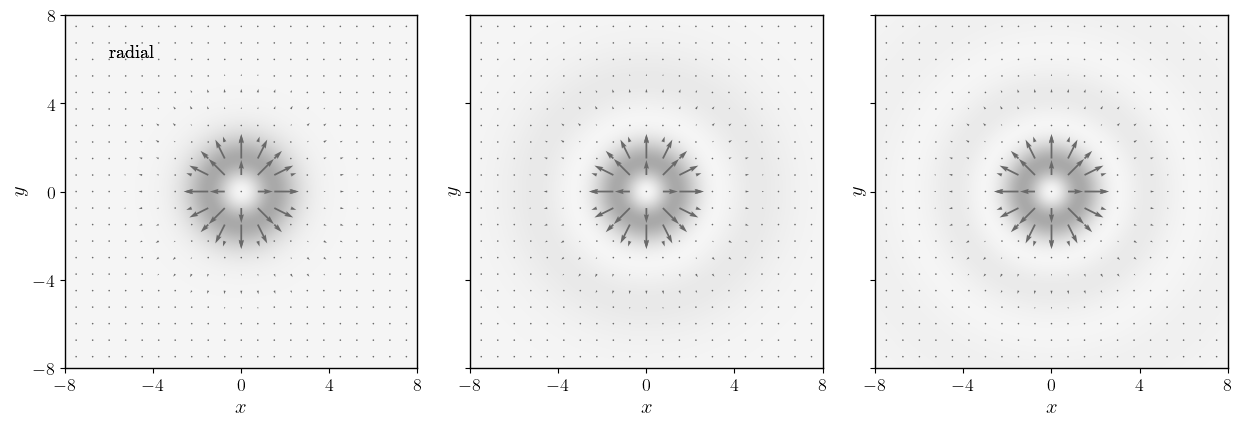

In [7]:
# PLOT POLARIZACION
fR = funcionesRadialDensidad
fRinX= []
fRinY= []
# RADIAL POLARIZACION
for i in range(3): 
    fR1 = fR[i]
    fRinX1 = lambda r, E, t, theta, phi: fR1(r)*np.cos(E*t)*np.sin(theta)*np.cos(phi)
    fRinY1 = lambda r, E, t, theta, phi: fR1(r)*np.cos(E*t)*np.sin(theta)*np.sin(phi)
    fRinX.append(fRinX1)
    fRinY.append(fRinY1)

# Data
times = [0, np.pi/2, np.pi] #[0, np.pi/4, np.pi/2+np.pi/4] np.pi/3, np.pi/2.2
rad = 8
xy0 = [0, 0]

# grid
nptx, npty = 25, 25
x = np.linspace(-rad-1, rad+1, nptx)
y = np.linspace(-rad-1, rad+1, npty)
xi, yi = np.meshgrid(x, y)

theta = np.pi/2
r = np.sqrt(xi**2+yi**2)
phi = lambda x, y: np.arctan2(y, x)

#phiVal = phi(yi, xi)
E = 1.0

#plt.subplots(figsize=(3, 3))
#for k in range(3): 
#    r = np.linspace(0,10,100)
#    fR2 = fR[k]   
#    plt.plot(r, fR2(r))


fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharex=True, sharey=True,  # =(12, 3.5)
                       gridspec_kw=dict(hspace=0.1, wspace=.15))



timesSt = [r't = $0$', r't=$\pi/(2E)$', r't=$\pi/E$']
timeP = [-0.02, -0.5, -0.5]

#plt.subplots(figsize=(2, 2))

for k in range(3): 
    
        fR2 = fR[k]
        fRinX2 = fRinX[k]
        fRinY2 = fRinY[k]

    #for i in range(3):
    #    ax[i].text(x=0+timeP[i], y=rad+0.9, s=timesSt[i], 
    #         rotation='horizontal', fontsize='small', zorder=120)

    
        t = times[0]

        circlef(ax[k], xy0, fR2, rad, halo_color='darkgrey', colf='whitesmoke', npt=600, orig=False,  # #afdaf0 
              colorbar=False, fig=fig, location='right', fraction=0.05, zorder=1)
        # radial
        ax[k].quiver(xi, yi, fRinX2(r, E, t, theta, phi(xi, yi)), fRinY2(r, E, t, theta, phi(xi, yi)),
               color='dimgrey', width=0.005, zorder=110, scale_units='xy', scale=0.65)



        ax[k].set_xlim(-rad, rad)
        ax[k].set_ylim(-rad, rad)
        ax[k].set_yticks(np.linspace(-rad, rad, 5))  
        ax[k].set_ylabel(r'$y$') 
        ax[k].set_xlabel(r'$x$')
        ax[k].set_xticks([])
        ax[k].set_xticks([])
        ax[k].set_xticks(np.linspace(-rad, rad, 5))

        # nombres
        labels = [r'linear', r'circular', r'radial']
        #labels2 = [r'$n=0$', r'$n=0$', r'$n=0$']
        xposi = [-4.5, -4.5, -4.5]
        #xposi2 = [2.8, 2.8, 2.8]

        ax[0].text(-6.0, 6.1, s=labels[2], fontsize='small')
        #ax[j].text(xposi2[j], -4.5, s=labels2[i], fontsize='small')

plt.savefig('RadialVectorfieldn012.png')
plt.show()

## Densidad y Campo Vectorial para Polarización Circular n=0. para tres tiempos. $\lambda = -1$, $t = [0, \pi/2, \pi]$

In [8]:
datosCircularLambdm1 = [1.0, 26.35148536319269, 0, -1, 0, None, 'DOP853', 1e-13, 1e-15, 0.5667978718259771]
en, Mas, rD, sD, dsD, uD, duD, cer0, LamV, gam = ru.profilesFromSolut(datosCircularLambdm1)
ftemp = interpolate.interp1d(rD, sD**2)
ftempP = interpolate.interp1d(rD, sD)

/var/folders/1k/wc33r23j7pd72wpg_rynb4hr0000gn/T/ipykernel_6948/1443424044.py:26: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharex=True, sharey=True,  # =(12, 3.5)


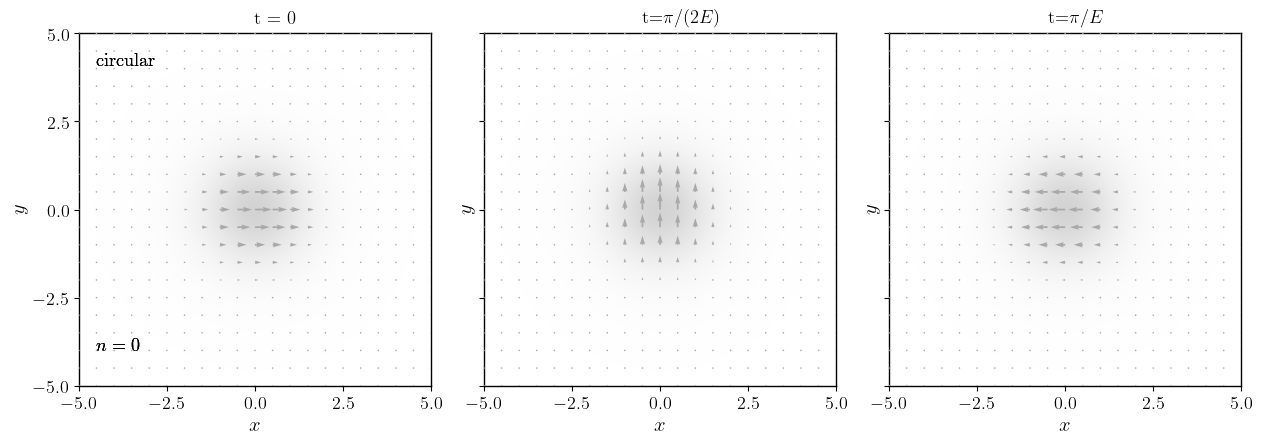

In [9]:
# PLOT POLARIZACION
fLC = ftemp # Función interpolada que depende de r. Densidad n(r).


# CIRCULAR POLARIZACION
fCinX = lambda r, E, t: fLC(r)*np.cos(E*t)/np.sqrt(2)
fCinY = lambda r, E, t: fLC(r)*np.sin(E*t)/np.sqrt(2)

# Data
times = [0, np.pi/2, np.pi] #[0, np.pi/4, np.pi/2+np.pi/4] np.pi/3, np.pi/2.2
rad = 5
xy0 = [0, 0]

# grid
nptx, npty = 25, 25
x = np.linspace(-rad-1, rad+1, nptx)
y = np.linspace(-rad-1, rad+1, npty)
xi, yi = np.meshgrid(x, y)

r = np.sqrt(xi**2+yi**2)
phi = lambda x, y: np.arctan2(y, x) #Ver coordenadas esfericas.

E = 1.0


fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharex=True, sharey=True,  # =(12, 3.5)
                       gridspec_kw=dict(hspace=0.1, wspace=.15))



timesSt = [r't = $0$', r't=$\pi/(2E)$', r't=$\pi/E$']
timeP = [-0.02, -0.5, -0.5]

for i in range(3):
    ax[i].text(x=0+timeP[i], y=rad+0.3, s=timesSt[i], 
         rotation='horizontal', fontsize='small', zorder=120)

for j,i in enumerate(times): 
    t = i
    
    circlef(ax[j], xy0, fLC, rad, halo_color='lightgray', colf='white', npt=600, orig=False,  # #afdaf0 
          colorbar=False, fig=fig, location='right', fraction=0.05, zorder=1)
    # radial
    ax[j].quiver(xi, yi, fCinX(r, E, t), fCinY(r, E, t), color='darkgrey', width=0.005, zorder=110, scale_units='xy', scale=1.5)



    ax[j].set_xlim(-rad, rad)
    ax[j].set_ylim(-rad, rad)
    ax[j].set_yticks(np.linspace(-rad, rad, 5))  
    ax[j].set_ylabel(r'$y$') 
    ax[j].set_xlabel(r'$x$')
    ax[j].set_xticks([])
    ax[j].set_xticks([])
    ax[j].set_xticks(np.linspace(-rad, rad, 5))

    # nombres
    labels = [r'linear', r'circular', r'radial']
    #labels2 = [r'$n=0$', r'$n=0$', r'$n=0$']
    xposi = [-4.5, -4.5, -4.5]
    #xposi2 = [2.8, 2.8, 2.8]

    ax[0].text(-4.5, 4.1, s=labels[1], fontsize='small')
    #ax[j].text(xposi2[j], -4.5, s=labels2[i], fontsize='small')
    ax[0].text(-4.5, -4.0, s=r'$n=0$', fontsize='small')

plt.savefig('Circular_field_n0_pol.png')
plt.show()

## Densidad y Campo Vectorial para Polarización Lineal n=0. para tres tiempos. $\lambda = -1$, $t = [0, \pi/2, \pi]$

In [10]:
datosCircularLambdm1 = [1.0, 26.35148536319269, 0, -1, 0, None, 'DOP853', 1e-13, 1e-15, 0.5667978718259771]
en, Mas, rD, sD, dsD, uD, duD, cer0, LamV, gam = ru.profilesFromSolut(datosCircularLambdm1)
DensidadLienal = interpolate.interp1d(rD, sD**2)
PerfilLineal = interpolate.interp1d(rD, sD)

/var/folders/1k/wc33r23j7pd72wpg_rynb4hr0000gn/T/ipykernel_6948/2897483768.py:27: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharex=True, sharey=True,  # =(12, 3.5)


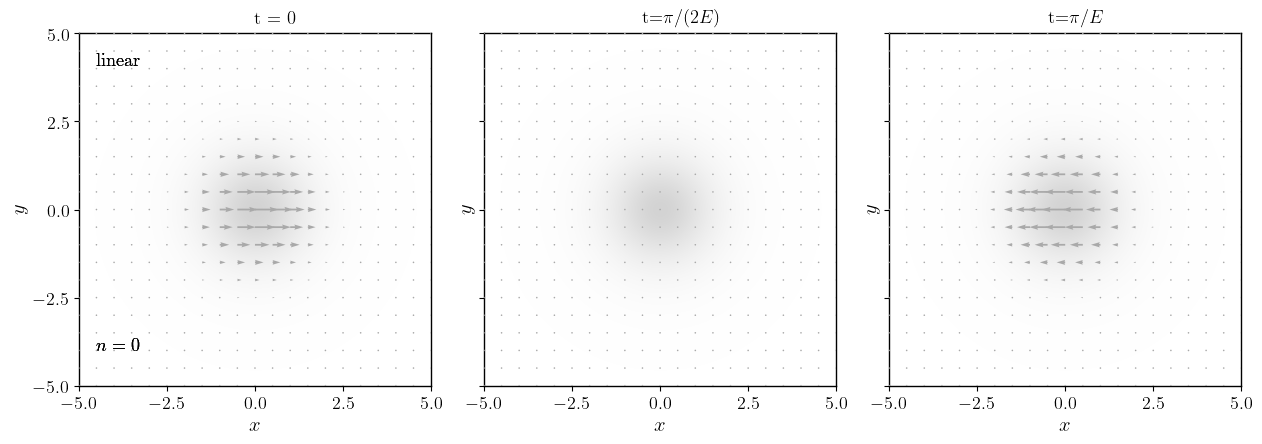

In [11]:
# lambda = -1, n = 0. 
# PLOT POLARIZACION
fLC = DensidadLienal # funcion de densidad n(r)


# EVOLUCIÓN LINEAL
fLinX = lambda r, E, t: fLC(r)*np.cos(E*t)
fLinY = lambda r, E, t: 0*r

# Data
times = [0, np.pi/2, np.pi] #[0, np.pi/4, np.pi/2+np.pi/4] np.pi/3, np.pi/2.2
rad = 5
xy0 = [0, 0]

# grid
nptx, npty = 25, 25
x = np.linspace(-rad-1, rad+1, nptx)
y = np.linspace(-rad-1, rad+1, npty)
xi, yi = np.meshgrid(x, y)

r = np.sqrt(xi**2+yi**2)
phi = lambda x, y: np.arctan2(y, x)

E = 1.0


fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharex=True, sharey=True,  # =(12, 3.5)
                       gridspec_kw=dict(hspace=0.1, wspace=.15))



timesSt = [r't = $0$', r't=$\pi/(2E)$', r't=$\pi/E$']
timeP = [-0.02, -0.5, -0.5]

for i in range(3):
    ax[i].text(x=0+timeP[i], y=rad+0.3, s=timesSt[i], 
         rotation='horizontal', fontsize='small', zorder=120)

for j,i in enumerate(times): 
    t = i
    
    circlef(ax[j], xy0, fLC, rad, halo_color='lightgray', colf='white', npt=600, orig=False,  # #afdaf0 
          colorbar=False, fig=fig, location='right', fraction=0.05, zorder=1)
    # radial
    ax[j].quiver(xi, yi, fLinX(r, E, t), fLinY(r, E, t), color='darkgrey', width=0.005, zorder=110, scale_units='xy', scale=1.5)



    ax[j].set_xlim(-rad, rad)
    ax[j].set_ylim(-rad, rad)
    ax[j].set_yticks(np.linspace(-rad, rad, 5))  
    ax[j].set_ylabel(r'$y$') 
    ax[j].set_xlabel(r'$x$')
    ax[j].set_xticks([])
    ax[j].set_xticks([])
    ax[j].set_xticks(np.linspace(-rad, rad, 5))

    # nombres
    labels = [r'linear', r'circular', r'radial']
    #labels2 = [r'$n=0$', r'$n=0$', r'$n=0$']
    xposi = [-4.5, -4.5, -4.5]
    #xposi2 = [2.8, 2.8, 2.8]

    ax[0].text(-4.5, 4.1, s=labels[0], fontsize='small')
    ax[0].text(-4.5, -4.0, s=r'$n=0$', fontsize='small')
    #ax[j].text(xposi2[j], -4.5, s=labels2[i], fontsize='small')
    
plt.savefig('Linear_field_n0.png')
plt.show()

## Densidad y Campo Vectorial para Polarización radial n=0. para tres tiempos. $\lambda = -1$, $t = [0, \pi/2, \pi]$

In [12]:
datosCircularLambdm1 = [1.0, 17.628902543553803, 1, -1, 0, None, 'DOP853', 1e-13, 1e-15, 1.1145690092270233]
en, Mas, rD, sD, dsD, uD, duD, cer0, LamV, gam = ru.profilesFromSolut(datosCircularLambdm1)
DensidadRadial = interpolate.interp1d(rD, (rD**2)*(sD**2))
PerfilRadial = interpolate.interp1d(rD, sD)

/var/folders/1k/wc33r23j7pd72wpg_rynb4hr0000gn/T/ipykernel_6948/3031180804.py:29: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharex=True, sharey=True,  # =(12, 3.5)


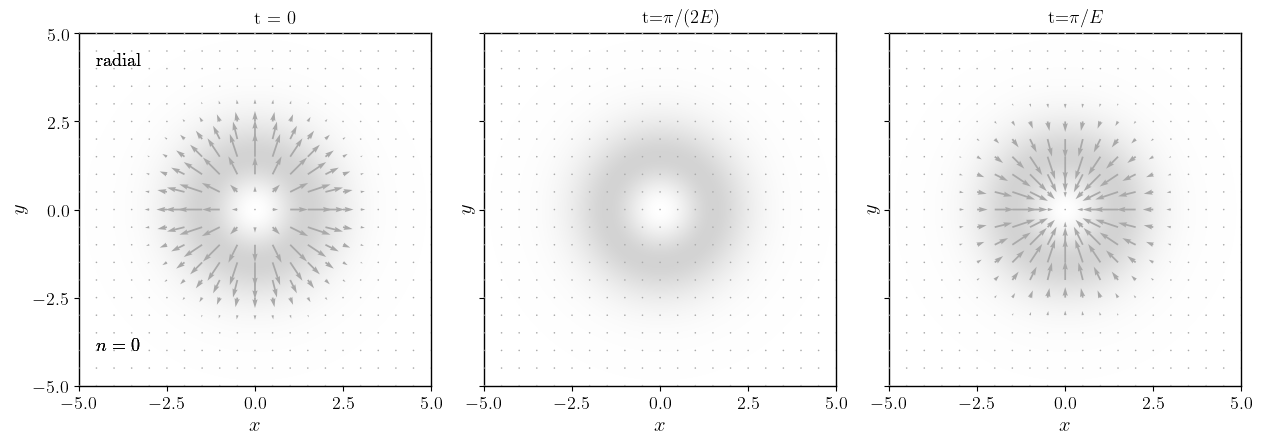

In [13]:
# lambda = -1, n = 0. 
# PLOT POLARIZACION
fR = DensidadRadial # funcion de densidad n(r)

# RADIAL POLARIZACION
fRinX = lambda r, E, t, theta, phi: fR(r)*np.cos(E*t)*np.sin(theta)*np.cos(phi)
fRinY = lambda r, E, t, theta, phi: fR(r)*np.cos(E*t)*np.sin(theta)*np.sin(phi)

# Data
times = [0, np.pi/2, np.pi] #[0, np.pi/4, np.pi/2+np.pi/4] np.pi/3, np.pi/2.2
rad = 5
xy0 = [0, 0]

# grid
nptx, npty = 25, 25
x = np.linspace(-rad-1, rad+1, nptx)
y = np.linspace(-rad-1, rad+1, npty)
xi, yi = np.meshgrid(x, y)

r = np.sqrt(xi**2+yi**2)
phi = lambda x, y: np.arctan2(y, x)

E = 1.0


theta = np.pi/2


fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharex=True, sharey=True,  # =(12, 3.5)
                       gridspec_kw=dict(hspace=0.1, wspace=.15))



timesSt = [r't = $0$', r't=$\pi/(2E)$', r't=$\pi/E$']
timeP = [-0.02, -0.5, -0.5]

for i in range(3):
    ax[i].text(x=0+timeP[i], y=rad+0.3, s=timesSt[i], 
         rotation='horizontal', fontsize='small', zorder=120)

for j,i in enumerate(times): 
    t = i
    
    circlef(ax[j], xy0, fR, rad, halo_color='lightgray', colf='white', npt=600, orig=False,  # #afdaf0 
          colorbar=False, fig=fig, location='right', fraction=0.05, zorder=1)
    # radial
    ax[j].quiver(xi, yi, fRinX(r, E, t, theta, phi(xi, yi)), fRinY(r, E, t, theta, phi(xi, yi)), color='darkgrey', width=0.005, zorder=110, scale_units='xy', scale=1.5)


    ax[j].set_xlim(-rad, rad)
    ax[j].set_ylim(-rad, rad)
    ax[j].set_yticks(np.linspace(-rad, rad, 5))  
    ax[j].set_ylabel(r'$y$') 
    ax[j].set_xlabel(r'$x$')
    ax[j].set_xticks([])
    ax[j].set_xticks([])
    ax[j].set_xticks(np.linspace(-rad, rad, 5))

    # nombres
    labels = [r'linear', r'circular', r'radial']
    #labels2 = [r'$n=0$', r'$n=0$', r'$n=0$']
    xposi = [-4.5, -4.5, -4.5]
    #xposi2 = [2.8, 2.8, 2.8]

    ax[0].text(-4.5, 4.1, s=labels[2], fontsize='small')
    ax[0].text(-4.5, -4.0, s=r'$n=0$', fontsize='small')
    #ax[j].text(xposi2[j], -4.5, s=labels2[i], fontsize='small')
    
plt.savefig('Radial_field_n0.png')
plt.show()

## Circular, lineal $n = 0,1,2$

/var/folders/1k/wc33r23j7pd72wpg_rynb4hr0000gn/T/ipykernel_6948/4238796530.py:7: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.subplots(figsize=(3, 3))


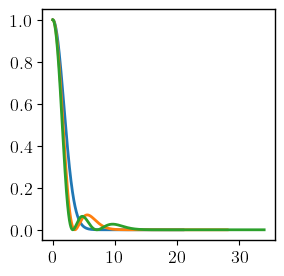

In [14]:
dataCircLineal = [[1.0, 20.933815765586345, 0, 1, 0, None, 'DOP853', 1e-13, 1e-15, 1.4796444065743395],
                  [1.0, 28.039009997530076, 0, 1, 1, 3.54927146, 'DOP853', 1e-13, 1e-15, 1.6676158758718198],
                  [1.0, 33.98239522336313, 0, 1, 2, [3.21567298, 7.08762372], 'DOP853', 1e-13, 1e-15, 1.7747065607002397]]
           
funcionesCircularLinealDensidad = []
funcionesCircularLinealPerfil  = []
plt.subplots(figsize=(3, 3))
for datos in dataCircLineal: 
    en, Mas, rD, sD, dsD, uD, duD, cer0, LamV, gam = ru.profilesFromSolut(datos)
    ftemp = interpolate.interp1d(rD, sD**2)
    ftemperfil = interpolate.interp1d(rD, sD)
    funcionesCircularLinealDensidad.append(ftemp)
    funcionesCircularLinealPerfil.append(ftemperfil)
    plt.plot(rD, ftemp(rD))

/var/folders/1k/wc33r23j7pd72wpg_rynb4hr0000gn/T/ipykernel_6948/4084706832.py:40: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharex=True, sharey=True,  # =(12, 3.5)


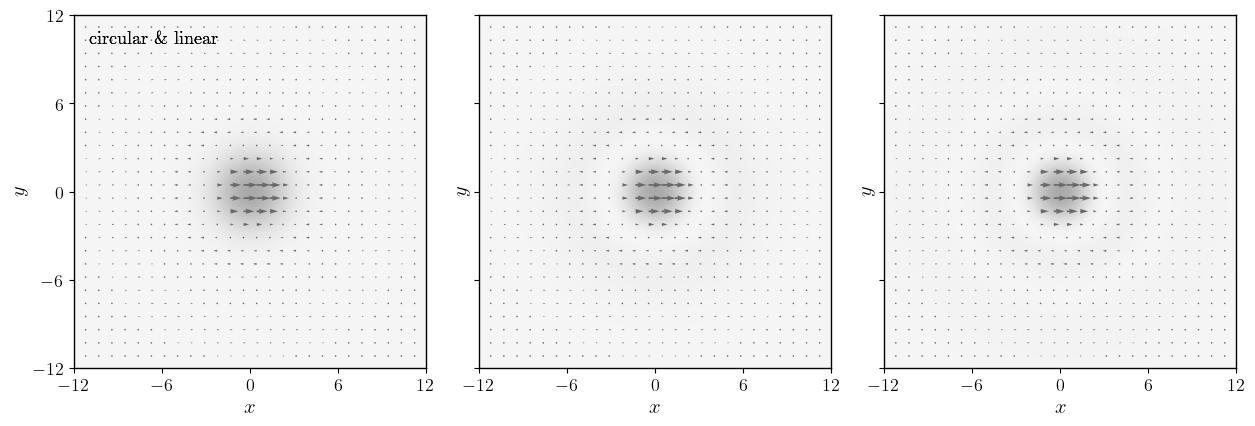

In [15]:
# PLOT POLARIZACION
fC = funcionesCircularLinealPerfil
fCD = funcionesCircularLinealDensidad
fCinX= []
fCinY= []
# RADIAL POLARIZACION
for i in range(3): 
    fC1 = fC[i]
   # EVOLUCIÓN LINEAL
    fCinX1 = lambda r, E, t: fC1(r)*np.cos(E*t)
    fCinY1 = lambda r, E, t: 0*r
    fCinX.append(fCinX1)
    fCinY.append(fCinY1)

# Data
times = [0, np.pi/2, np.pi] #[0, np.pi/4, np.pi/2+np.pi/4] np.pi/3, np.pi/2.2
rad = 12
xy0 = [0, 0]

# grid
nptx, npty = 30, 30
x = np.linspace(-rad-1, rad+1, nptx)
y = np.linspace(-rad-1, rad+1, npty)
xi, yi = np.meshgrid(x, y)

theta = np.pi/2
r = np.sqrt(xi**2+yi**2)
phi = lambda x, y: np.arctan2(y, x)

#phiVal = phi(yi, xi)
E = 1.0

#plt.subplots(figsize=(3, 3))
#for k in range(3): 
#    r = np.linspace(0,10,100)
#    fR2 = fR[k]   
#    plt.plot(r, fR2(r))


fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharex=True, sharey=True,  # =(12, 3.5)
                       gridspec_kw=dict(hspace=0.1, wspace=.15))



timesSt = [r't = $0$', r't=$\pi/(2E)$', r't=$\pi/E$']
timeP = [-0.02, -0.5, -0.5]

#plt.subplots(figsize=(2, 2))

for k in range(3): 
    
        fC2 = fCD[k]
        fCinX2 = fCinX[k]
        fCinY2 = fCinY[k]

    #for i in range(3):
    #    ax[i].text(x=0+timeP[i], y=rad+0.9, s=timesSt[i], 
    #         rotation='horizontal', fontsize='small', zorder=120)

    
        t = times[0]

        circlef(ax[k], xy0, fC2, rad, halo_color='darkgrey', colf='whitesmoke', npt=800, orig=False,  # #afdaf0 
              colorbar=False, fig=fig, location='right', fraction=0.05, zorder=1)
        # radial
        ax[k].quiver(xi, yi, fCinX2(r, E, t), fCinY2(r, E, t),
               color='dimgrey', width=0.005, zorder=110, scale_units='xy', scale=1.0)


        ax[k].set_xlim(-rad, rad)
        ax[k].set_ylim(-rad, rad)
        ax[k].set_yticks(np.linspace(-rad, rad, 5))  
        ax[k].set_ylabel(r'$y$') 
        ax[k].set_xlabel(r'$x$')
        ax[k].set_xticks([])
        ax[k].set_xticks([])
        ax[k].set_xticks(np.linspace(-rad, rad, 5))

        # nombres
        labels = [r'linear', r'circular \& linear', r'radial']
        #labels2 = [r'$n=0$', r'$n=0$', r'$n=0$']
        xposi = [-4.5, -4.5, -4.5]
        #xposi2 = [2.8, 2.8, 2.8]

        ax[0].text(-11.0, 10.1, s=labels[1], fontsize='small')
        #ax[j].text(xposi2[j], -4.5, s=labels2[i], fontsize='small')

plt.savefig('CircularVectorfieldn012.png')
plt.show()